In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('../')  # set the working directory as "./sobot_rimulator"
os.getcwd()

'/home/yixing/code/project_work/sobot-rimulator'

# Analysis of Time Cost

In [61]:
solver = "Cholesky"  #  cholesky or spsolve
df = pd.read_csv("./scripts/result/time_cost_g2o_{0}.csv".format(solver.lower()))
df["log_global_error"] = np.log(df["global_error"])
df.head(15)

FileNotFoundError: [Errno 2] No such file or directory: './scripts/result/time_cost_g2o_cholesky.csv'

name
MITB     0.214191
INTEL    0.316613
M3500    1.270573
dtype: float64

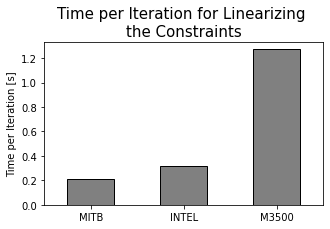

In [45]:
linear_time = df.pivot(index = "iteration", columns = "name", 
            values="linearization_time_cost")
linear_time = linear_time[linear_time.index != 0]
linear_time = linear_time[["MITB", "INTEL", "M3500"]]
linear_time = linear_time.mean()
# colors=['black', 'dimgray','darkgray']
linear_time.plot(kind = "bar", rot = 0, color = "gray", edgecolor="k", figsize=(5,3))
plt.xlabel("")
plt.ylabel("Time per Iteration [s]")
plt.title("Time per Iteration for Linearizing \nthe Constraints", size = 15)
#plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5),
#          fancybox=True, shadow=True)
plt.savefig('./scripts/fig/{0}.eps'.format("Time_per_Iteration_for_Linearizing_the_Constraints"), 
            format='eps', bbox_inches='tight')
linear_time


name
MITB     0.000969
INTEL    0.001828
M3500    0.010817
dtype: float64

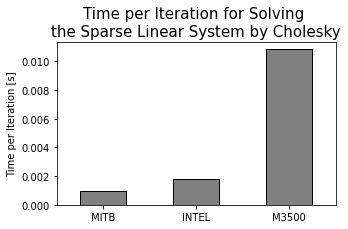

In [46]:
solve_time = df.pivot(index = "iteration", columns = "name", values="solve_time_cost")
solve_time = solve_time[solve_time.index != 0]
solve_time = solve_time[["MITB", "INTEL", "M3500"]]
solve_time = solve_time.mean()
# colors=['black', 'dimgray','darkgray']
solve_time.plot(kind = "bar", rot = 0, color = "gray", edgecolor="k", figsize=(5,3))
plt.xlabel("")
plt.ylabel("Time per Iteration [s]")
#plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5),
#          fancybox=True, shadow=True)
plt.title("Time per Iteration for Solving \nthe Sparse Linear System by {0}".format(solver), size = 15)
plt.savefig('./scripts/fig/{0}.eps'.format("Time_per_Iteration_for_Solving_the_Sparse_Linear_System"), 
            format='eps', bbox_inches='tight')
solve_time


name,INTEL,M3500,MITB
iteration,,,
0,15.454453,14.758119,22.208088
1,18.833873,12.987964,23.688812
2,15.453164,9.910266,19.863481
3,10.394104,5.576181,17.940031
4,5.374650,4.926852,18.599890
5,5.374506,4.926623,15.444616
6,5.374506,4.926623,12.998432
7,5.374507,4.926623,7.518804
8,5.374507,4.926623,6.688553


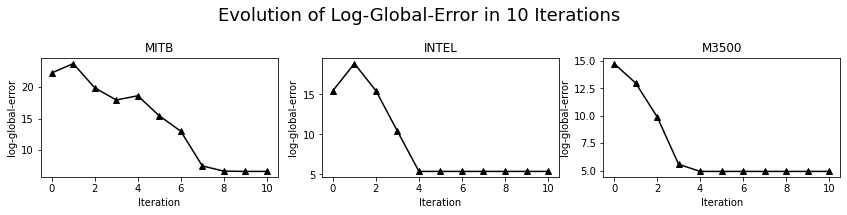

In [47]:
global_error = df.pivot(index = "iteration", columns = "name", values="log_global_error")

plt.subplot(1,3,2)
global_error["INTEL"].plot(color = "k", marker = "^", rot = 0, figsize=(12,3))
plt.xlabel("Iteration")
plt.ylabel("log-global-error")
plt.title("INTEL")

plt.subplot(1,3,3)
global_error["M3500"].plot(color = "k", marker = "^", rot = 0)
plt.xlabel("Iteration")
plt.ylabel("log-global-error")
plt.title("M3500")

plt.subplot(1,3,1)
global_error["MITB"].plot(color = "k", marker = "^", rot = 0)
plt.xlabel("Iteration")
plt.ylabel("log-global-error")
plt.title("MITB")
plt.suptitle("Evolution of Log-Global-Error in 10 Iterations", size = 18)
plt.tight_layout()
plt.savefig('./scripts/fig/{0}.eps'.format("Evolution_of_Global_Error"), format='eps')
global_error


In [3]:
import math

#filename = "./scripts/sobot_information1.csv"
filename = "../experiment/sobot_information1_exp1.csv"
df = pd.read_csv(filename, index_col=0)
df.head(10)

,sim_circle,landmark_id,estimated_landmark_position,estimated_robot_pose,actual_landmark_position,actual_robot_pose,slam_name
0,21,5,"(-0.3937302932774861, 0.2922313449456154)","(-0.15079165003632802, 0.24709369178616, 2.730...","(-0.4276580103886659, 0.3373424400495555, -0.3...","(-0.16177054180753817, 0.26432764083670973, 2....",Graph-based SLAM
1,22,5,"(-0.3937302932774861, 0.2922313449456154)","(-0.16476234415566565, 0.2513661170378793, 2.9...","(-0.4276580103886659, 0.3373424400495555, -0.3...","(-0.17526976625542068, 0.2700683734127768, 2.9...",Graph-based SLAM
2,23,5,"(-0.3937302932774861, 0.2922313449456154)","(-0.18154180114866222, 0.2525282964953975, -3....","(-0.4276580103886659, 0.3373424400495555, -0.3...","(-0.19168585612143194, 0.2729139730093493, -3....",Graph-based SLAM
3,24,5,"(-0.3937302932774861, 0.2922313449456154)","(-0.20182566159721174, 0.25021888860940056, -2...","(-0.4276580103886659, 0.3373424400495555, -0.3...","(-0.2121393525993701, 0.2718155557797013, -2.9...",Graph-based SLAM
4,25,5,"(-0.3937302932774861, 0.2922313449456154)","(-0.22538955139660954, 0.2450205099201408, -2....","(-0.4276580103886659, 0.3373424400495555, -0.3...","(-0.23590560324456575, 0.2672314668394577, -2....",Graph-based SLAM
5,26,5,"(-0.3937302932774861, 0.2922313449456154)","(-0.25133155099875126, 0.23782547774438934, -2...","(-0.4276580103886659, 0.3373424400495555, -0.3...","(-0.2619596290376511, 0.2603581555755498, -2.8...",Graph-based SLAM
6,26,6,"(-0.4381283791714322, 0.22622601592398395)","(-0.25133155099875126, 0.23782547774438934, -2...","(-0.4852153217199568, 0.24157949304172702, 2.8...","(-0.2619596290376511, 0.2603581555755498, -2.8...",Graph-based SLAM
7,27,5,"(-0.3937302932774861, 0.2922313449456154)","(-0.2790122851020065, 0.22932342346144718, -2....","(-0.4276580103886659, 0.3373424400495555, -0.3...","(-0.2896019327591873, 0.2519228789487837, -2.8...",Graph-based SLAM
8,27,6,"(-0.4381283791714322, 0.22622601592398395)","(-0.2790122851020065, 0.22932342346144718, -2....","(-0.4852153217199568, 0.24157949304172702, 2.8...","(-0.2896019327591873, 0.2519228789487837, -2.8...",Graph-based SLAM
9,28,5,"(-0.3937302932774861, 0.2922313449456154)","(-0.2792313357920828, 0.2292253631546347, -2.6...","(-0.4276580103886659, 0.3373424400495555, -0.3...","(-0.2897491861731441, 0.25187495026036827, -2....",Graph-based SLAM


In [49]:
# print(df["sim_circle"].min(), df["sim_circle"].max())
# # df["slam_name"] = df["slam_name"] - df["sim_circle"].min()
# min_sim_circle  = df["sim_circle"].min()
# df["sim_circle"] = df.apply (lambda row: row.sim_circle - min_sim_circle + 1, axis=1)


In [4]:
df


,sim_circle,landmark_id,estimated_landmark_position,estimated_robot_pose,actual_landmark_position,actual_robot_pose,slam_name
0,21,5,"(-0.3937302932774861, 0.2922313449456154)","(-0.15079165003632802, 0.24709369178616, 2.730...","(-0.4276580103886659, 0.3373424400495555, -0.3...","(-0.16177054180753817, 0.26432764083670973, 2....",Graph-based SLAM
1,22,5,"(-0.3937302932774861, 0.2922313449456154)","(-0.16476234415566565, 0.2513661170378793, 2.9...","(-0.4276580103886659, 0.3373424400495555, -0.3...","(-0.17526976625542068, 0.2700683734127768, 2.9...",Graph-based SLAM
2,23,5,"(-0.3937302932774861, 0.2922313449456154)","(-0.18154180114866222, 0.2525282964953975, -3....","(-0.4276580103886659, 0.3373424400495555, -0.3...","(-0.19168585612143194, 0.2729139730093493, -3....",Graph-based SLAM
3,24,5,"(-0.3937302932774861, 0.2922313449456154)","(-0.20182566159721174, 0.25021888860940056, -2...","(-0.4276580103886659, 0.3373424400495555, -0.3...","(-0.2121393525993701, 0.2718155557797013, -2.9...",Graph-based SLAM
4,25,5,"(-0.3937302932774861, 0.2922313449456154)","(-0.22538955139660954, 0.2450205099201408, -2....","(-0.4276580103886659, 0.3373424400495555, -0.3...","(-0.23590560324456575, 0.2672314668394577, -2....",Graph-based SLAM
...,...,...,...,...,...,...,...
858706,8395,357,"(-0.558977608904726, -2.670276064905267)","(0.39636410996355825, 0.9306995976464482, -2.8...","(-0.49540392929233373, -2.7421469054410323, 2....","(0.4007260354376268, 0.9847846260996999, -2.86...",Graph-based SLAM
858707,8395,355,"(-0.5457106251631292, -2.9487240942697652)","(0.39636410996355825, 0.9306995976464482, -2.8...","(-0.47986810566081595, -3.0120024237678362, -3...","(0.4007260354376268, 0.9847846260996999, -2.86...",Graph-based SLAM
858708,8395,362,"(-0.5977803463991207, -1.862243231547167)","(0.39636410996355825, 0.9306995976464482, -2.8...","(-0.5302572652587505, -1.8987757940423708, -2....","(0.4007260354376268, 0.9847846260996999, -2.86...",Graph-based SLAM
858709,8395,300,"(0.8724822666018883, 0.3623365458148504)","(0.39636410996355825, 0.9306995976464482, -2.8...","(0.8964800747121207, 0.44724491261704014, 0.97...","(0.4007260354376268, 0.9847846260996999, -2.86...",Graph-based SLAM


In [5]:
#filename = "./scripts/sobot_information2_exp1.csv"
filename = "../experiment/sobot_information2_exp1.csv"
df2 = pd.read_csv(filename, index_col=0)
df2.head(5)

# print(df2["sim_circle"].min(), df2["sim_circle"].max())
# # df["slam_name"] = df["slam_name"] - df["sim_circle"].min()
# min_sim_circle  = df2["sim_circle"].min()
# df2["sim_circle"] = df2.apply (lambda row: row.sim_circle - min_sim_circle + 1, axis=1)

,sim_circle,name,time_per_update
0,1,Graph-based SLAM,0.000054
1,1,OccupancyGridMapping2d,0.000311
2,1,A Star planning,0.000001
3,2,Graph-based SLAM,0.000059
4,2,OccupancyGridMapping2d,0.000666


In [6]:
df2.tail(10)

,sim_circle,name,time_per_update
25037,8391,A Star planning,0.000002
25038,8392,Graph-based SLAM,0.000058
25039,8392,OccupancyGridMapping2d,0.000296
25040,8392,A Star planning,0.000002
25041,8393,Graph-based SLAM,0.000058
25042,8393,OccupancyGridMapping2d,0.000282
25043,8393,A Star planning,0.000001
25044,8394,Graph-based SLAM,0.000079
25045,8394,OccupancyGridMapping2d,0.000320
25046,8394,A Star planning,0.001204


In [7]:
df = df[df["sim_circle"] < 8000]
df.tail(10)

,sim_circle,landmark_id,estimated_landmark_position,estimated_robot_pose,actual_landmark_position,actual_robot_pose,slam_name
801558,7999,275,"(-1.5995029358795951, -2.433072062290165)","(0.3750387200433783, 0.8295494046221115, -0.92...","(-1.6041605291253427, -2.4638527566604527, -1....","(0.347977358541191, 0.8173371300855743, -0.926...",Graph-based SLAM
801559,7999,272,"(-1.2812939853331118, -2.1467086036855525)","(0.3750387200433783, 0.8295494046221115, -0.92...","(-1.2709549190086107, -2.1595797906023284, 0.1...","(0.347977358541191, 0.8173371300855743, -0.926...",Graph-based SLAM
801560,7999,270,"(-1.1880879787504113, -2.087856870550228)","(0.3750387200433783, 0.8295494046221115, -0.92...","(-1.1729740285099557, -2.098849171271129, 0.65...","(0.347977358541191, 0.8173371300855743, -0.926...",Graph-based SLAM
801561,7999,361,"(-0.5820764178664799, -2.1496898669132514)","(0.3750387200433783, 0.8295494046221115, -0.92...","(-0.5233857298074553, -2.2155418925601698, 3.0...","(0.347977358541191, 0.8173371300855743, -0.926...",Graph-based SLAM
801562,7999,360,"(-0.5768918845372811, -2.2630830034067326)","(0.3750387200433783, 0.8295494046221115, -0.92...","(-0.5191086210947925, -2.3247095584228186, 0.6...","(0.347977358541191, 0.8173371300855743, -0.926...",Graph-based SLAM
801563,7999,359,"(-0.5701295744602174, -2.3688270256596846)","(0.3750387200433783, 0.8295494046221115, -0.92...","(-0.5074583008097566, -2.4350128338177575, 0.4...","(0.347977358541191, 0.8173371300855743, -0.926...",Graph-based SLAM
801564,7999,268,"(-0.7325196114567267, -1.9476493414454052)","(0.3750387200433783, 0.8295494046221115, -0.92...","(-0.6856240234066736, -1.9705381273845417, -2....","(0.347977358541191, 0.8173371300855743, -0.926...",Graph-based SLAM
801565,7999,357,"(-0.5577881554692328, -2.669162765253566)","(0.3750387200433783, 0.8295494046221115, -0.92...","(-0.49540392929233373, -2.7421469054410323, 2....","(0.347977358541191, 0.8173371300855743, -0.926...",Graph-based SLAM
801566,7999,355,"(-0.5439946886968801, -2.9475865792950993)","(0.3750387200433783, 0.8295494046221115, -0.92...","(-0.47986810566081595, -3.0120024237678362, -3...","(0.347977358541191, 0.8173371300855743, -0.926...",Graph-based SLAM
801567,7999,362,"(-0.5981739443494655, -1.8612102994044408)","(0.3750387200433783, 0.8295494046221115, -0.92...","(-0.5302572652587505, -1.8987757940423708, -2....","(0.347977358541191, 0.8173371300855743, -0.926...",Graph-based SLAM


In [8]:
df2 = df2[df2["sim_circle"] < 8000]
df2.tail(10)

,sim_circle,name,time_per_update
23858,7996,A Star planning,0.000003
23859,7997,Graph-based SLAM,0.000296
23860,7997,OccupancyGridMapping2d,0.000280
23861,7997,A Star planning,0.011303
23862,7998,Graph-based SLAM,0.000084
23863,7998,OccupancyGridMapping2d,0.000296
23864,7998,A Star planning,0.000002
23865,7999,Graph-based SLAM,0.000060
23866,7999,OccupancyGridMapping2d,0.000284
23867,7999,A Star planning,0.000001


# Evaluation Landmark Positions

In [9]:
df_lm = df[["sim_circle", "slam_name", "landmark_id", "estimated_landmark_position", "actual_landmark_position"]]
df_lm

,sim_circle,slam_name,landmark_id,estimated_landmark_position,actual_landmark_position
0,21,Graph-based SLAM,5,"(-0.3937302932774861, 0.2922313449456154)","(-0.4276580103886659, 0.3373424400495555, -0.3..."
1,22,Graph-based SLAM,5,"(-0.3937302932774861, 0.2922313449456154)","(-0.4276580103886659, 0.3373424400495555, -0.3..."
2,23,Graph-based SLAM,5,"(-0.3937302932774861, 0.2922313449456154)","(-0.4276580103886659, 0.3373424400495555, -0.3..."
3,24,Graph-based SLAM,5,"(-0.3937302932774861, 0.2922313449456154)","(-0.4276580103886659, 0.3373424400495555, -0.3..."
4,25,Graph-based SLAM,5,"(-0.3937302932774861, 0.2922313449456154)","(-0.4276580103886659, 0.3373424400495555, -0.3..."
...,...,...,...,...,...
801563,7999,Graph-based SLAM,359,"(-0.5701295744602174, -2.3688270256596846)","(-0.5074583008097566, -2.4350128338177575, 0.4..."
801564,7999,Graph-based SLAM,268,"(-0.7325196114567267, -1.9476493414454052)","(-0.6856240234066736, -1.9705381273845417, -2...."
801565,7999,Graph-based SLAM,357,"(-0.5577881554692328, -2.669162765253566)","(-0.49540392929233373, -2.7421469054410323, 2...."
801566,7999,Graph-based SLAM,355,"(-0.5439946886968801, -2.9475865792950993)","(-0.47986810566081595, -3.0120024237678362, -3..."


In [10]:
actual_landmark_position = df_lm["actual_landmark_position"].tolist()
actual_landmark_position = list(set(actual_landmark_position))
print("# Landmarks:", len(actual_landmark_position))

# Landmarks: 143


In [11]:
id = df_lm["landmark_id"].tolist()
id = list(set(id))
print (id)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 38, 39, 41, 42, 43, 44, 46, 47, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 74, 75, 76, 77, 78, 81, 82, 84, 86, 148, 149, 151, 153, 170, 171, 230, 231, 232, 236, 239, 240, 241, 242, 244, 245, 251, 252, 268, 270, 272, 275, 290, 292, 293, 296, 297, 298, 299, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 316, 317, 318, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 357, 359, 360, 361, 362, 372, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397]


In [12]:
# calculate distance
actual_landmark_position =  np.array([eval(x)[0:2] for x in df_lm["actual_landmark_position"].tolist()])
estimated_landmark_position = np.array([eval(x) for x in df_lm["estimated_landmark_position"].tolist()])
actual_landmark_position

array([[-0.42765801,  0.33734244],
       [-0.42765801,  0.33734244],
       [-0.42765801,  0.33734244],
       ...,
       [-0.49540393, -2.74214691],
       [-0.47986811, -3.01200242],
       [-0.53025727, -1.89877579]])

In [13]:
distance = np.linalg.norm(actual_landmark_position-estimated_landmark_position, axis = 1)
df_lm.loc[:, 'distance'] = distance

/home/yixing/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/yixing/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [14]:
df_lm.tail(10)

,sim_circle,slam_name,landmark_id,estimated_landmark_position,actual_landmark_position,distance
801558,7999,Graph-based SLAM,275,"(-1.5995029358795951, -2.433072062290165)","(-1.6041605291253427, -2.4638527566604527, -1....",0.031131
801559,7999,Graph-based SLAM,272,"(-1.2812939853331118, -2.1467086036855525)","(-1.2709549190086107, -2.1595797906023284, 0.1...",0.016510
801560,7999,Graph-based SLAM,270,"(-1.1880879787504113, -2.087856870550228)","(-1.1729740285099557, -2.098849171271129, 0.65...",0.018689
801561,7999,Graph-based SLAM,361,"(-0.5820764178664799, -2.1496898669132514)","(-0.5233857298074553, -2.2155418925601698, 3.0...",0.088210
801562,7999,Graph-based SLAM,360,"(-0.5768918845372811, -2.2630830034067326)","(-0.5191086210947925, -2.3247095584228186, 0.6...",0.084479
801563,7999,Graph-based SLAM,359,"(-0.5701295744602174, -2.3688270256596846)","(-0.5074583008097566, -2.4350128338177575, 0.4...",0.091150
801564,7999,Graph-based SLAM,268,"(-0.7325196114567267, -1.9476493414454052)","(-0.6856240234066736, -1.9705381273845417, -2....",0.052183
801565,7999,Graph-based SLAM,357,"(-0.5577881554692328, -2.669162765253566)","(-0.49540392929233373, -2.7421469054410323, 2....",0.096013
801566,7999,Graph-based SLAM,355,"(-0.5439946886968801, -2.9475865792950993)","(-0.47986810566081595, -3.0120024237678362, -3...",0.090893
801567,7999,Graph-based SLAM,362,"(-0.5981739443494655, -1.8612102994044408)","(-0.5302572652587505, -1.8987757940423708, -2....",0.077613


In [15]:
df_lm_sum = df_lm.groupby(['sim_circle','slam_name'])["distance"].mean().unstack(level = -1)
df_lm_sum.tail(10)

slam_name,Graph-based SLAM
sim_circle,
7990,0.071021
7991,0.071021
7992,0.071021
7993,0.071021
7994,0.071021
7995,0.071021
7996,0.071021
7997,0.071021
7998,0.071021


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


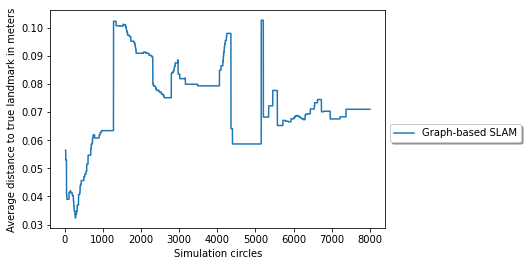

In [16]:

df_lm_sum.plot()
#plt.ylim(0, 1.75)
plt.xlabel("Simulation circles")
plt.ylabel("Average distance to true landmark in meters")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5),
          fancybox=True, shadow=True)
plt.savefig('./scripts/fig/{0}.eps'.format("fig1"), format='eps', bbox_inches='tight')

# Evaluation Robot Poses

In [21]:
df.tail(5)

,sim_circle,landmark_id,estimated_landmark_position,estimated_robot_pose,actual_landmark_position,actual_robot_pose,slam_name
873004,7999,9,"(-0.5346322275796804, -0.15252861653387906)","(-1.0964198535604481, -0.36074673890757064, -1...","(-0.5924002018837868, -0.1538575896575562, -1....","(-1.1062954339515654, -0.32606011163313126, -1...",Graph-based SLAM
873005,7999,47,"(-2.040963099687534, 1.4052398300489877)","(-1.0964198535604481, -0.36074673890757064, -1...","(-2.08754885321744, 1.4884233112575753, -0.748...","(-1.1062954339515654, -0.32606011163313126, -1...",Graph-based SLAM
873006,7999,42,"(-2.8136405063584036, 1.517821904900148)","(-1.0964198535604481, -0.36074673890757064, -1...","(-2.900698522281105, 1.6453411768463273, -0.49...","(-1.1062954339515654, -0.32606011163313126, -1...",Graph-based SLAM
873007,7999,40,"(-3.1822207819146584, 1.5364251128545212)","(-1.0964198535604481, -0.36074673890757064, -1...","(-3.2890204042551554, 1.6963383988396246, 1.74...","(-1.1062954339515654, -0.32606011163313126, -1...",Graph-based SLAM
873008,7999,39,"(-3.2380177130157204, 1.603279752681826)","(-1.0964198535604481, -0.36074673890757064, -1...","(-3.3011167651453577, 1.752526833145084, 1.727...","(-1.1062954339515654, -0.32606011163313126, -1...",Graph-based SLAM


In [18]:
df_robot = df[["sim_circle","estimated_robot_pose","actual_robot_pose","slam_name"]]
df_robot = df_robot.drop_duplicates(["sim_circle", "slam_name"])
df_robot
df_robot.tail(10)

,sim_circle,estimated_robot_pose,actual_robot_pose,slam_name
800138,7990,"(0.20486539063216785, 1.0532455976478805, -0.9...","(0.1784120069812083, 1.0410676923938482, -0.91...",Graph-based SLAM
800281,7991,"(0.2235765075395944, 1.0289827001574188, -0.91...","(0.19708227080683563, 1.0168994639341362, -0.9...",Graph-based SLAM
800424,7992,"(0.24247913420530992, 1.0042694809798696, -0.9...","(0.21595853065308412, 0.9921244666271242, -0.9...",Graph-based SLAM
800567,7993,"(0.2613210883453268, 0.979513745491857, -0.921...","(0.23478862175693896, 0.9674057552511148, -0.9...",Graph-based SLAM
800710,7994,"(0.280214873544058, 0.9545938696830851, -0.922...","(0.2536359160278846, 0.9425433789280465, -0.92...",Graph-based SLAM
800853,7995,"(0.2991725048210055, 0.9295693716941904, -0.92...","(0.2725499865358409, 0.9174280321175129, -0.92...",Graph-based SLAM
800996,7996,"(0.31814339029221067, 0.9045558421689157, -0.9...","(0.291345194616349, 0.8924424816057683, -0.924...",Graph-based SLAM
801139,7997,"(0.3371719837215222, 0.8794809456518897, -0.92...","(0.3102671728662751, 0.8673573884169213, -0.92...",Graph-based SLAM
801282,7998,"(0.3561172903755226, 0.8544956258595113, -0.92...","(0.3291721625079305, 0.8423872208216749, -0.92...",Graph-based SLAM
801425,7999,"(0.3750387200433783, 0.8295494046221115, -0.92...","(0.347977358541191, 0.8173371300855743, -0.926...",Graph-based SLAM


In [19]:
estimated_robot_pose = np.array([eval(x)[0:2] for x in df_robot["estimated_robot_pose"].tolist()])
actual_robot_pose = np.array([eval(x)[0:2] for x in df_robot["actual_robot_pose"].tolist()])
distance = np.linalg.norm(estimated_robot_pose-actual_robot_pose, axis = 1)
df_robot.loc[:, 'distance'] = distance
df_robot.tail(10)

# calculate distance
# estimated_robot_pose = np.array(df_robot["estimated_robot_pose"].tolist())[:, 0:2]
# actual_robot_pose = np.array(df_robot["actual_robot_pose"].tolist())[:, 0:2]
# distance = np.linalg.norm(estimated_robot_pose-actual_robot_pose, axis = 1)
# df_robot.loc[:, 'distance'] = distance
# df_robot.tail(10)

,sim_circle,estimated_robot_pose,actual_robot_pose,slam_name,distance
800138,7990,"(0.20486539063216785, 1.0532455976478805, -0.9...","(0.1784120069812083, 1.0410676923938482, -0.91...",Graph-based SLAM,0.029122
800281,7991,"(0.2235765075395944, 1.0289827001574188, -0.91...","(0.19708227080683563, 1.0168994639341362, -0.9...",Graph-based SLAM,0.029120
800424,7992,"(0.24247913420530992, 1.0042694809798696, -0.9...","(0.21595853065308412, 0.9921244666271242, -0.9...",Graph-based SLAM,0.029169
800567,7993,"(0.2613210883453268, 0.979513745491857, -0.921...","(0.23478862175693896, 0.9674057552511148, -0.9...",Graph-based SLAM,0.029165
800710,7994,"(0.280214873544058, 0.9545938696830851, -0.922...","(0.2536359160278846, 0.9425433789280465, -0.92...",Graph-based SLAM,0.029183
800853,7995,"(0.2991725048210055, 0.9295693716941904, -0.92...","(0.2725499865358409, 0.9174280321175129, -0.92...",Graph-based SLAM,0.029260
800996,7996,"(0.31814339029221067, 0.9045558421689157, -0.9...","(0.291345194616349, 0.8924424816057683, -0.924...",Graph-based SLAM,0.029409
801139,7997,"(0.3371719837215222, 0.8794809456518897, -0.92...","(0.3102671728662751, 0.8673573884169213, -0.92...",Graph-based SLAM,0.029510
801282,7998,"(0.3561172903755226, 0.8544956258595113, -0.92...","(0.3291721625079305, 0.8423872208216749, -0.92...",Graph-based SLAM,0.029541
801425,7999,"(0.3750387200433783, 0.8295494046221115, -0.92...","(0.347977358541191, 0.8173371300855743, -0.926...",Graph-based SLAM,0.029689


In [20]:
df_robot_pivot = df_robot.pivot(index = "sim_circle", columns = "slam_name", 
            values="distance")
df_robot_pivot

slam_name,Graph-based SLAM
sim_circle,
21,0.020434
22,0.021452
23,0.022770
24,0.023933
25,0.024575
...,...
7995,0.029260
7996,0.029409
7997,0.029510


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


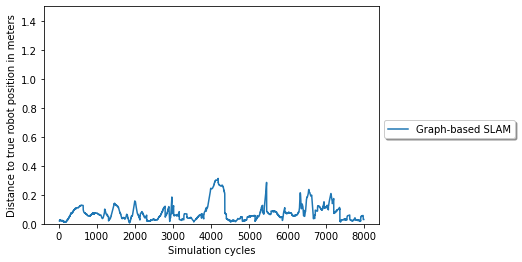

In [21]:
df_robot_pivot.plot()
plt.ylim(0,2)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5),
          fancybox=True, shadow=True)
plt.ylim(0,1.5)
plt.xlabel("Simulation cycles")
plt.ylabel("Distance to true robot position in meters")
plt.savefig('./scripts/fig/{0}.eps'.format("fig2"), format='eps', bbox_inches='tight')

KeyError: 'EKF SLAM'

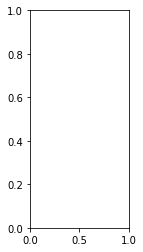

In [22]:

plt.subplot(1,3,1)
df_robot_pivot["EKF SLAM"].plot(color = "k", rot = 0, figsize=(15,3))
plt.xlabel("Simulation cycles")
plt.ylabel("Distance to true robot position in meters")
plt.title("EKF SLAM")

plt.subplot(1,3,2)
df_robot_pivot["FastSLAM"].plot(color = "k", rot = 0, figsize=(15,3))
plt.xlabel("Simulation cycles")
plt.ylabel("Distance to true robot position in meters")
plt.title("FastSLAM")

plt.subplot(1,3,3)
df_robot_pivot["Graph-based SLAM"].plot(color = "k", rot = 0, figsize=(15,3))
plt.xlabel("Simulation cycles")
plt.ylabel("Distance to true robot position in meters")
plt.title("Graph-based SLAM")

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.savefig('./scripts/fig/{0}.eps'.format("fig4"), format='eps', bbox_inches='tight')

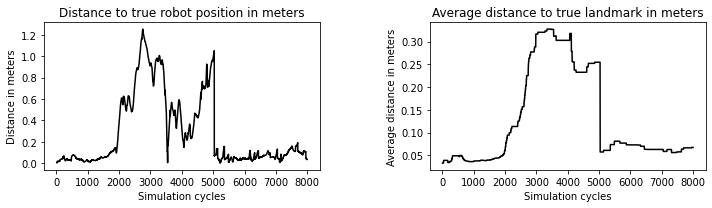

In [37]:
plt.subplot(1,2,1)
df_robot_pivot["Graph-based SLAM"].plot(color = "k", rot = 0, figsize=(10,3))
plt.xlabel("Simulation cycles")
plt.ylabel("Distance in meters")
plt.title("Distance to true robot position in meters")

plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
#plt.savefig('./scripts/fig/{0}.eps'.format("fig4"), format='eps', bbox_inches='tight')
plt.subplot(1,2,2)
df_lm_sum["Graph-based SLAM"].plot(color = "k", rot = 0, figsize=(10,3))
plt.xlabel("Simulation cycles")
plt.ylabel("Average distance in meters")
plt.title("Average distance to true landmark in meters")
plt.savefig('./scripts/fig/{0}.eps'.format("fig4"), format='eps', bbox_inches='tight')

In [ ]:
plt.subplot(1,3,1)
df_lm_sum["EKF SLAM"].plot(color = "k", rot = 0, figsize=(15,3))
plt.xlabel("Simulation cycles")
plt.ylabel("Average distance to true landmark in meters")
plt.title("EKF SLAM")

plt.subplot(1,3,2)
df_lm_sum["FastSLAM"].plot(color = "k", rot = 0, figsize=(15,3))
plt.xlabel("Simulation cycles")
plt.ylabel("Average distance to true landmark in meters")
plt.title("FastSLAM")

plt.subplot(1,3,3)
df_lm_sum["Graph-based SLAM"].plot(color = "k", rot = 0, figsize=(15,3))
plt.xlabel("Simulation cycles")
plt.ylabel("Average distance to true landmark in meters")
plt.title("Graph-based SLAM")
plt.savefig('./scripts/fig/{0}.eps'.format("fig5"), format='eps', bbox_inches='tight')

# Time used in Update

In [23]:
df2.head(10)

,sim_circle,name,time_per_update
0,1,Graph-based SLAM,0.000054
1,1,OccupancyGridMapping2d,0.000311
2,1,A Star planning,0.000001
3,2,Graph-based SLAM,0.000059
4,2,OccupancyGridMapping2d,0.000666
5,2,A Star planning,0.000002
6,3,Graph-based SLAM,0.000065
7,3,OccupancyGridMapping2d,0.000293
8,3,A Star planning,0.000001
9,4,Graph-based SLAM,0.000082


In [24]:
df2_mean = df2.groupby(["sim_circle", "name"])["time_per_update"].mean().unstack()
df2_mean.head(50)

name,A Star planning,Graph-based SLAM,OccupancyGridMapping2d
sim_circle,,,
1,0.000001,0.000054,0.000311
2,0.000002,0.000059,0.000666
3,0.000001,0.000065,0.000293
4,0.000001,0.000082,0.000354
5,0.000002,0.000060,0.000365
6,0.000002,0.000062,0.000342
7,0.000002,0.000127,0.001000
8,0.000002,0.000059,0.000376
9,0.000024,0.000218,0.000306


(0.0, 0.1)

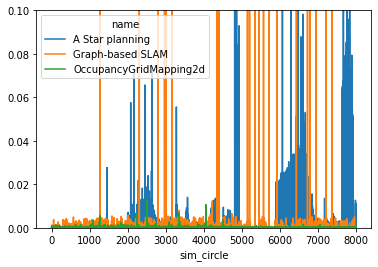

In [25]:
df2_mean.plot()
plt.ylim(0, 0.1)

KeyError: 'EKF SLAM'

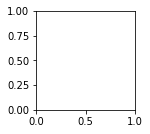

In [26]:
df2_cum = df2_mean.cumsum() #.plot(subplots=True, layout=(2,3), figsize = (12,8), rot = 0)
# plt.legend(loc='upper left', fancybox=True, shadow=True)
# plt.xlabel("Simulation circles")
# plt.ylabel("Cumulative time used for updates")

plt.subplot(2,3,1)

df2_cum["EKF SLAM"].plot(color = "k", rot = 0, figsize=(15,6))
plt.xlabel("Simulation circles")
plt.ylabel("Cumulative time used for updates [s]")
plt.title("EKF SLAM")

plt.subplot(2,3,2)
df2_cum["FastSLAM"].plot(color = "k", rot = 0, figsize=(15,6))
plt.xlabel("Simulation circles")
plt.ylabel("Cumulative time used for updates [s]")
plt.title("Fast SLAM")

plt.subplot(2,3,3)
df2_cum["Graph-based SLAM"].plot(color = "k", rot = 0, figsize=(15,6))
plt.xlabel("Simulation circles")
plt.ylabel("Cumulative time used for updates [s]")
plt.title("Graph-based SLAM")

plt.subplot(2,3,4)
df2_cum["OccupancyGridMapping2d"].plot(color = "k", rot = 0, figsize=(15,6))
plt.xlabel("Simulation circles")
plt.ylabel("Cumulative time used for updates [s]")
plt.title("Occupancy Grid Mapping")

plt.subplot(2,3,5)
df2_cum["A Star planning"].plot(color = "k", rot = 0, figsize=(15,6))
plt.xlabel("Simulation circles")
plt.ylabel("Cumulative time used for updates [s]")
plt.title("A* Path Planning")

plt.suptitle("Cumulative Time Used for Updates in 6000 Iterations", size = 18)
plt.savefig('./scripts/fig/{0}.eps'.format("fig3"), format='eps')
plt.tight_layout()

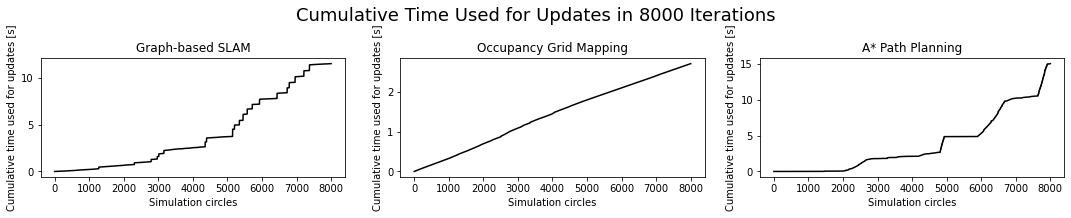

In [30]:
df2_cum = df2_mean.cumsum()
plt.subplot(1,3,1)
df2_cum["Graph-based SLAM"].plot(color = "k", rot = 0, figsize=(15,3))
plt.xlabel("Simulation circles")
plt.ylabel("Cumulative time used for updates [s]")
plt.title("Graph-based SLAM")

plt.subplot(1,3,2)
df2_cum["OccupancyGridMapping2d"].plot(color = "k", rot = 0, figsize=(15,3))
plt.xlabel("Simulation circles")
plt.ylabel("Cumulative time used for updates [s]")
plt.title("Occupancy Grid Mapping")

plt.subplot(1,3,3)
df2_cum["A Star planning"].plot(color = "k", rot = 0, figsize=(15,3))
plt.xlabel("Simulation circles")
plt.ylabel("Cumulative time used for updates [s]")
plt.title("A* Path Planning")

plt.suptitle("Cumulative Time Used for Updates in 8000 Iterations", size = 18)
plt.tight_layout()
plt.savefig('./scripts/fig/{0}.eps'.format("fig3"), format='eps', bbox_inches='tight')


In [31]:
df2_cum.max()

name
A Star planning           15.060858
Graph-based SLAM          11.519683
OccupancyGridMapping2d     2.706235
dtype: float64

In [59]:
global_error = df.pivot(index = "iteration", columns = "name", values="global_error")

plt.subplot(1,3,2)
global_error["INTEL"].plot(color = "k", marker = "^", rot = 0, figsize=(12,3))
plt.xlabel("Iteration")
plt.ylabel("Global error")
plt.title("INTEL")

plt.subplot(1,3,3)
global_error["M3500"].plot(color = "k", marker = "^", rot = 0)
plt.xlabel("Iteration")
plt.ylabel("Global error")
plt.title("M3500")

plt.subplot(1,3,1)
global_error["MITB"].plot(color = "k", marker = "^", rot = 0)
plt.xlabel("Iteration")
plt.ylabel("Global error")
plt.title("MITB")
plt.suptitle("Evolution of Global Error in 10 Iterations", size = 18)
plt.tight_layout()
plt.savefig('./scripts/fig/{0}.eps'.format("Evolution_of_Global_Error"), format='eps')
global_error

KeyError: 'iteration'